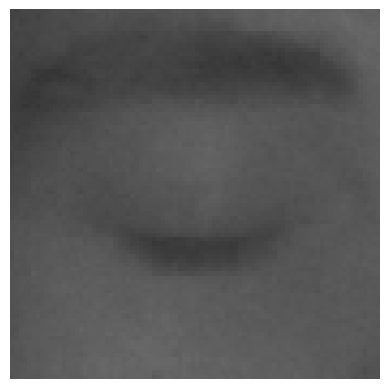

1/1 [==============================] - 5s 5s/step
Predicted label: Close-Eyes


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load the model
model = load_model('../Models/model2.h5')

def predict_and_display_single_image(image_path, class_names, model):
    # Load and preprocess the image
    img = keras_image.load_img(image_path, target_size=(86, 86))  # Resize to match model input size
    img_array = img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize the image

    # Display the input image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Predict the label
    batch_prediction = model.predict(img_array)
    predicted_label = class_names[0] if batch_prediction[0][0] < 0.5 else class_names[1]

    print("Predicted label:", predicted_label)

# Example class names
class_names = ['Close-Eyes', 'Open-Eyes']

# Path to the image
image_path = "../Dataset/Close-Eyes/s0001_00102_0_0_0_0_0_01.png"

# Predict and display
predict_and_display_single_image(image_path=image_path, class_names=class_names, model=model)